### Auto Regressive Conditional Heteroskedasticity (ARCH) Model

ARCH Model has several equations - one for mean and other for variance. The term heteroskedasticity means that the variance is not constant, It changes with time. Condiditional heteroskedasticity alludes to the distribution of the variance in a given time period conditional to the values of variance in the previous time periods.

$Var(y_{t} | y_{t-1}) = \alpha_{0} + \alpha_{1} \epsilon_{t-1}^2 $

We represent $\sigma_{t}$ with $Var(y_{t} | y_{t-1})$

Therefore, we can write ARCH(1) as,

$\sigma_{t}^2 = \alpha_{0} + \alpha_{1} \epsilon_{t-1}^2 $

ARCH(q)

$\sigma_{t}^2 = \alpha_{0} + \alpha_{1} \epsilon_{t-1}^2 + \alpha_{1} \epsilon_{t-2}^2 + ..... + \alpha_{1} \epsilon_{t-q}^2$

As mentioned earlier the ARCH model consists of two equtations - one for mean and the other for variance. Here we develop a model that assumes mean  is a function of time and estimates mean using appropriate ARIMAX model,estimates the residuals at each step as predicted by the given model and uses the errors to estimate the variance.

Mean Equation - 

$r_{t} = C_{0} + \psi_{1} \mu_{t-1} + \epsilon_{t}$

Variance Equation - 

$\sigma_{t}^2 = \alpha_{0} + \alpha_{1} \epsilon_{t-1}^2 $

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [5]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

/var/folders/g_/tkt2lv051zv8z_1rjnskg3hr0000gn/T/ipykernel_866/927300507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1) * 100


### Creating Squared Returns

In [7]:
df['sq_returns'] =df.returns.mul(df.returns)

/var/folders/g_/tkt2lv051zv8z_1rjnskg3hr0000gn/T/ipykernel_866/2922578979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sq_returns'] =df.returns.mul(df.returns)


### Comparing Returns and Squared Returns.

Squaring removes the sign and amplifies the signal. Let's see the graphs.

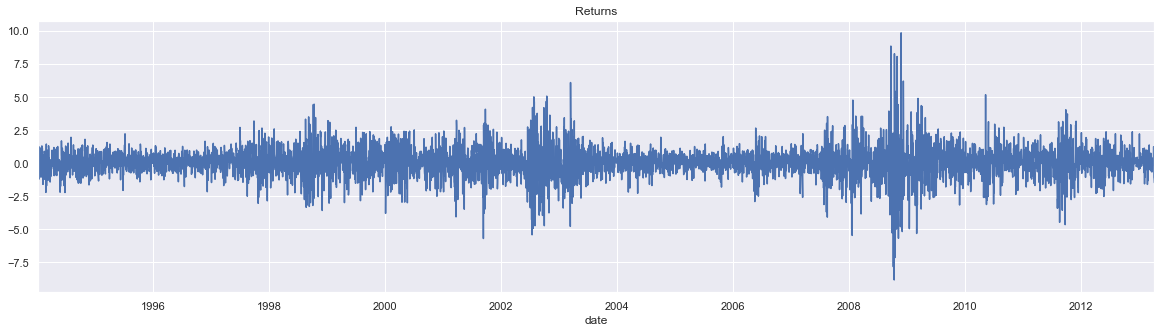

In [8]:
df.returns.plot(figsize=(20,5))
plt.title('Returns')
plt.show()

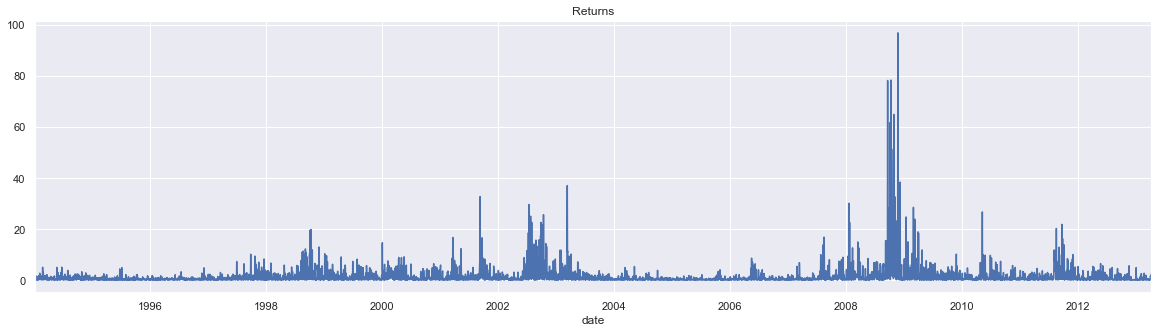

In [9]:
df.sq_returns.plot(figsize=(20,5))
plt.title('Returns')
plt.show()

### Plotting PACF of Returns

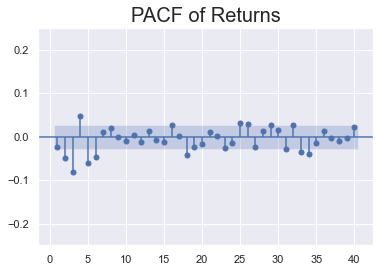

In [10]:
sgt.plot_pacf(df.returns[1:],lags=40,alpha=0.05,zero=False,method=('ols'))
plt.title('PACF of Returns',size=20)
plt.ylim(-0.25,0.25)
plt.show()

### Plotting PACF of Squared Returns

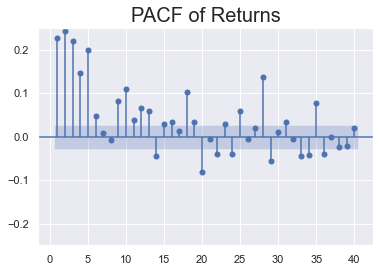

In [11]:
sgt.plot_pacf(df.sq_returns[1:],lags=40,alpha=0.05,zero=False,method=('ols'))
plt.title('PACF of Returns',size=20)
plt.ylim(-0.25,0.25)
plt.show()

These plots tell us that the significant correlation for first few lags in both returns and squared returns. High values for few early lags in the sq returns tells us that the volatility shows short term trends, ie. high volatility periods are followed by high volatility and low volatility periods are followed by low volatility. It is also called clustering.

### The arch_model() function

In [12]:
from arch import arch_model

In [13]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035835212278
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712887007633
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418108744094
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271338807877
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.879266228052
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088048943886
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478413694
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.0583674757745
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189882
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189167
Optimization terminated successfully    (Exit mode 0)
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Fri, Dec 10 2021   Df Residuals:                     5019
Time:                        01:23:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

### Reading the results 

The first table shows that the mean is estimated using the constant mean model and the variance using GARCH. The second table gives the details regarding the mean model. The third table provides the details regarding the volatility model.

### Simple ARCH(1) model 

In [14]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Fri, Dec 10 2021   Df Residuals:                     5019
Time:                        01:23:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

The constant mean model shows R-squared a 0. This is the model is not dependent on any of the predictors, so there is effectively nothing to explain, hence 0 percentage of variation. DF = 3. All three coefficients we estimated in the model are significant and thelog likelihood is also better than the ARIMA models.

### ARCH(2) Models

In [15]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Fri, Dec 10 2021   Df Residuals:                     5019
Time:                        01:23:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

The instructor checked the values of the higher order models and found that the stats improve uptill order = 13. Next, we are going to see what happens when we introduce previous values of the variances in the model. 

### GARCH Model

$\sigma_{t}^2 = \omega + \alpha_{1} \epsilon_{t-1}^2 + \beta_{1} \sigma_{t-1}^2 $

In [16]:
model_garch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1,q = 1)
results_garch_1 = model_garch_1.fit(update_freq = 5)
results_garch_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712887007633
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478413694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189882
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Fri, Dec 10 2021   Df Residuals:                     5019
Time:                        01:23:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

LLR has improved over ARMA and all the coefficients are significant.

### Higher Level GARCH models

Suffice to say that GARCH(1,1) has been proven theoretically and empirically better at predicting returns than the higher order GARCH models.